# Lab 6: Image Segmentation

### 1. Objectives
This lab focuses on understanding and applying various image segmentation techniques to separate objects or regions of interest from an image.
You will implement and compare different methods, including thresholding, clustering, edge-based, and region-based segmentation.

### 2. Submission Guidelines
- File Format: Jupyter Notebook (.ipynb)
- Naming: Lab6_StudentFullName_StudentID.ipynb
- Submission: Compress the Jupyter Notebook file Lab6_StudentFullName_StudentID.zip then upload to Moodle

### 3. Preparation

Install required packages if not installed

In [2]:
pip install numpy matplotlib opencv-python scikit-image

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Then, we load the required libraries and images

In [3]:
# Import the necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io, color
import os

# Load images for Part A
part_a_color = cv2.imread('color.png', cv2.IMREAD_COLOR)
part_a_grayscale = cv2.imread('grayscale.png', cv2.IMREAD_GRAYSCALE)

# Load images for Part B
part_b_images = {
    'Image1.jpg': cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE),
    'Image2.jpg': cv2.imread('Image2.jpg', cv2.IMREAD_COLOR),
    'Image3.jpg': cv2.imread('Image3.png', cv2.IMREAD_COLOR),
    'Image4.jpg': cv2.imread('Image4.jpg', cv2.IMREAD_COLOR)
}

if part_a_color is None or part_a_grayscale is None or any(img is None for img in part_b_images.values()):
    print("Error: Could not load one or more images. Please ensure the files are in the 'lab6_images' directory.")
else:
    print("All required images loaded successfully.")

All required images loaded successfully.


### A. Basic Segmentation Techniques

In this section, you will apply fundamental segmentation techniques to a color and a grayscale image to understand their principles and compare their outputs. This part will use a variety of methods, including thresholding, clustering, edge detection, and region-based segmentation.

#### 1. Thresholding

Thresholding is one of the simplest segmentation techniques. It classifies each pixel as **foreground** or **background** by comparing its intensity to a threshold value $ T $:

$$
g(x, y) =
\begin{cases}
    255, & \text{if } f(x, y) > T \\
    0,   & \text{otherwise}
\end{cases}
$$

Where $ f(x, y) $ is the original image and $ g(x, y) $ is the binary output.

**Techniques used:**

1. **Simple Thresholding (`cv2.THRESH_BINARY`)**  
   Uses a fixed, manually chosen threshold $ T $ (e.g., 127). This method works best when illumination is uniform.

2. **Otsu's Binarization (`cv2.THRESH_OTSU`)**  
   In Otsu's method, the grayscale histogram of the image is modeled as being composed of **two classes**:

   - **Class 0 (Background):** All pixels with intensity values $ \leq T $
   - **Class 1 (Foreground):** All pixels with intensity values $ > T $

   Here, $ T $ is the threshold being tested. The method tries all possible thresholds (0–255 for 8-bit images) and chooses the one that best separates these two classes.

   **Intra-class variance** measures how spread out the pixel intensities are *within* each class. For a given threshold $ T $:

   $$
   \sigma_w^2(T) = w_0(T) \sigma_0^2(T) + w_1(T) \sigma_1^2(T)
   $$

   Where:
   - $ w_0(T) $ = proportion of pixels in Class 0
   - $ w_1(T) $ = proportion of pixels in Class 1
   - $ \sigma_0^2(T) $ = variance of intensities in Class 0
   - $ \sigma_1^2(T) $ = variance of intensities in Class 1

   The **goal** is to find the $ T^* $ that minimizes this weighted sum, meaning each class is as *compact* as possible in intensity values, automatically determines the optimal threshold $ T^* $ by minimizing **intra-class variance** (or equivalently maximizing inter-class variance):

   $$
   T^* = \arg\min_T \left[ w_0(T)\sigma_0^2(T) + w_1(T)\sigma_1^2(T) \right]
   $$
   where $ w_0, w_1 $ are the probabilities of each class and $ \sigma_0^2, \sigma_1^2 $ are their variances.

   ![Otsu's Binarization with automatic threshold selection](./otsu-histogram.png)

3. **Adaptive Thresholding (`cv2.ADAPTIVE_THRESH_GAUSSIAN_C`)**  
   Unlike **global thresholding** (Simple or Otsu's), which uses **one single threshold value** for the whole image, **Adaptive Thresholding** computes a **different threshold for each pixel** based on its local neighborhood.

   This approach is especially useful when:
   - The image has **non-uniform lighting**.
   - Shadows, glare, or gradual intensity changes make a global threshold unreliable.

   **How it works:**
   1. For each pixel $ (x, y) $, consider a neighborhood window $ N $ around it (e.g., 11×11 pixels).
   2. Compute a local statistic from $ N $ — either the **mean** or a **Gaussian-weighted mean**.
   3. Subtract a constant $ C $ to fine-tune the sensitivity.

   For Gaussian adaptive thresholding (as used in OpenCV's `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`):
   $$
   T(x, y) = \frac{\sum_{(i,j) \in N} w_{ij} \cdot f(i,j)}{\sum_{(i,j) \in N} w_{ij}} - C
   $$
   Where:
   - $ f(i,j) $ is the pixel intensity at position $ (i, j) $
   - $ w_{ij} $ are Gaussian weights (higher weight for pixels closer to the center)
   - $ C $ is a user-chosen constant that adjusts how much darker or lighter the threshold is compared to the local mean

   **Intuition:**
   - Bright regions and dark regions get their **own locally tuned thresholds**, preventing under- or over-segmentation due to uneven lighting.
   - The window size controls how much local variation is considered — too small may overfit to noise, too large may behave like global thresholding.

**Tasks:**
1. For a grayscale image, apply:
   - Simple Thresholding.
   - Otsu's Thresholding.
   - Adaptive Thresholding.
2. Display the original and thresholded images side-by-side for comparison.

This comparison helps reveal how each method handles different lighting and contrast conditions.

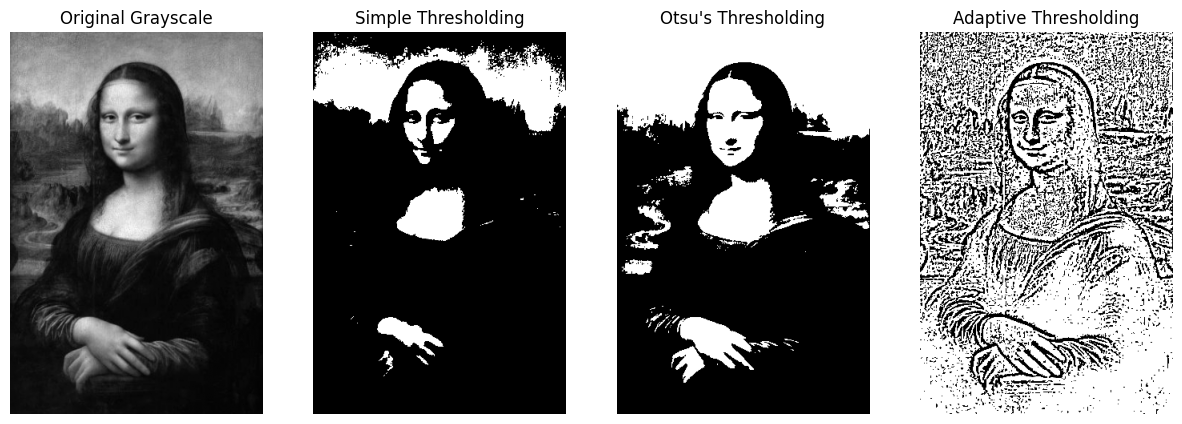

In [4]:
# Task A.1: Implement and apply various thresholding techniques.
if part_a_grayscale is not None:
    # TODO: Apply Simple Thresholding
    ret, simple_thresh = cv2.threshold(part_a_grayscale, 127, 255, cv2.THRESH_BINARY)

    # TODO: Apply Otsu's Thresholding
    ret, otsu_thresh = cv2.threshold(part_a_grayscale, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # TODO: Apply Adaptive Thresholding
    adaptive_thresh = cv2.adaptiveThreshold(
        part_a_grayscale, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  
        cv2.THRESH_BINARY,
        11,  
        2   
    )

    # Display the results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(part_a_grayscale, cmap='gray')
    plt.title('Original Grayscale')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(simple_thresh, cmap='gray')
    plt.title('Simple Thresholding')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(otsu_thresh, cmap='gray')
    plt.title('Otsu\'s Thresholding')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(adaptive_thresh, cmap='gray')
    plt.title('Adaptive Thresholding')
    plt.axis('off')
    plt.show()

#### 2. Clustering (K-means)
Apply K-means clustering to segment an image based on pixel colors. This method groups similar pixels together into a specified number of clusters (K).

![K-means Clustering Visualization](./k-means.gif)

**K-means clustering** is an **unsupervised learning** algorithm used to partition data points into `K` clusters, where each point belongs to the cluster with the nearest mean (centroid). In image processing, we can treat **each pixel** as a data point in a 3D color space (e.g., RGB) and group them by similarity in color.

Given:
- A set of $n$ pixels: $X = \{x_1, x_2, \dots, x_n\}$, where each $x_i = [R_i, G_i, B_i]$.
- A number of clusters $K$.

The goal is to minimize the **within-cluster sum of squares (WCSS)**:

$$
J = \sum_{j=1}^K \sum_{x_i \in C_j} \| x_i - \mu_j \|^2
$$

Where:
- $C_j$ is the set of pixels assigned to cluster $j$.
- $\mu_j$ is the centroid (mean RGB value) of cluster $j$.
- $\| x_i - \mu_j \|^2$ is the squared Euclidean distance in RGB space.

**Algorithm Steps**:
1. **Initialization**: Randomly select $K$ pixels as initial centroids.
2. **Assignment step**: For each pixel $x_i$, assign it to the nearest centroid:
$$
c_i = \arg\min_j \| x_i - \mu_j \|^2
$$
3. **Update step**: Recalculate each centroid as the mean of pixels in that cluster:
$$
\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
$$
4. **Repeat** steps 2–3 until convergence or a maximum number of iterations is reached.

**Tasks**:
1. Select a color image and reshape it to a 2D array of pixels.
2. Apply K-means clustering for `k=2`, `k=3`, and `k=4`.
3. Reconstruct the image from the clustered labels.
4. Display the original and the three clustered images for comparison.

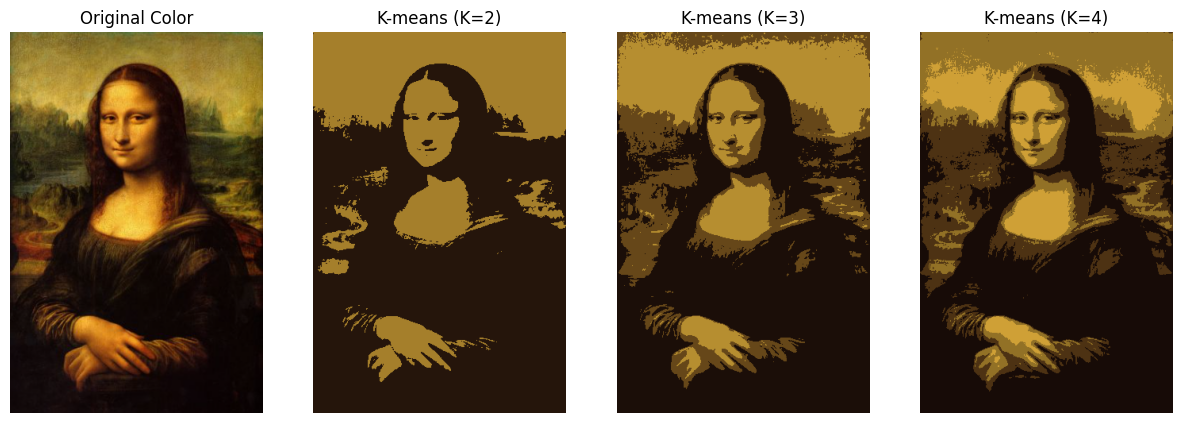

In [5]:
# Task A.2: Implement and apply K-means clustering.
if part_a_color is not None:
    # Convert to float32 and reshape for K-means
    img_color = part_a_color.astype(np.float32)
    img_reshaped = img_color.reshape((-1, 3))

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    # TODO: K-means with K=2
    k = 2
    compact2, labels2, centers2 = cv2.kmeans(img_reshaped, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers2 = np.uint8(centers2)
    res_k2 = centers2[labels2.flatten()].reshape(part_a_color.shape)

    # TODO: K-means with K=3
    k = 3
    compact3, labels3, centers3 = cv2.kmeans(img_reshaped, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers3 = np.uint8(centers3)
    res_k3 = centers3[labels3.flatten()].reshape(part_a_color.shape)

    # TODO: K-means with K=4
    k = 4
    compact4, labels4, centers4 = cv2.kmeans(img_reshaped, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers4 = np.uint8(centers4)
    res_k4 = centers4[labels4.flatten()].reshape(part_a_color.shape)

    # Display the results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(part_a_color, cv2.COLOR_BGR2RGB))
    plt.title('Original Color')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(res_k2, cv2.COLOR_BGR2RGB))
    plt.title('K-means (K=2)')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(res_k3, cv2.COLOR_BGR2RGB))
    plt.title('K-means (K=3)')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(res_k4, cv2.COLOR_BGR2RGB))
    plt.title('K-means (K=4)')
    plt.axis('off')
    plt.show()

#### 3. Edge-based Segmentation
Apply Canny and Laplace edge detection filters to identify boundaries and outlines in an image. These techniques are often used to find object borders, which can be the first step in segmentation.

**Mathematical Idea**

Edges are points in an image where the **image gradient magnitude** is high:
$$
\nabla I = \left[ \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right]
$$
The gradient magnitude is computed as:
$$
|\nabla I| = \sqrt{ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 }
$$
A large $|\nabla I|$ indicates a sudden change in intensity, an **edge**.

### 3.1 Canny Edge Detection
The **Canny** algorithm (John F. Canny, 1986) is a multi-stage process:
1. **Noise reduction**: Apply Gaussian blur to smooth the image.
2. **Gradient computation**: Use Sobel operators to estimate $\frac{\partial I}{\partial x}$ and $\frac{\partial I}{\partial y}$.
3. **Non-maximum suppression**: Keep only local maxima in the gradient direction.
4. **Hysteresis thresholding**: Use two thresholds (low and high) to decide which edges are strong, weak, or suppressed.

![Hysteresis Thresholding](./Hysteresis.png)

![Hysteresis Thresholding 2](./Hysteresis-2.jpg)

In OpenCV:
```python
edges_canny = cv2.Canny(image, threshold1=100, threshold2=200)
```
Here, `threshold1` and `threshold2` are the low and high hysteresis thresholds.

### 3.2 Laplacian Edge Detection
The **Laplacian** operator detects edges by finding regions where the second derivative changes sign (**zero-crossings**):
$$
\nabla^2 I = \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2}
$$
Unlike gradient-based methods that look for steep slopes, the Laplacian highlights areas where intensity changes direction.

In OpenCV:
```python
edges_laplace = cv2.Laplacian(image, cv2.CV_64F)
edges_laplace = np.uint8(np.absolute(edges_laplace))
```

**Comparison**:
- **Canny**: More sophisticated, includes noise suppression and produces clean, thin edges.
- **Laplacian**: Simpler, detects all rapid intensity changes but is more sensitive to noise.

**Tasks**:
1. Select an image (grayscale or color).
2. Apply Canny edge detection using `cv2.Canny`.
3. Apply Laplace edge detection using `cv2.Laplacian`.
4. Display the original and the two edge-detected images for comparison.

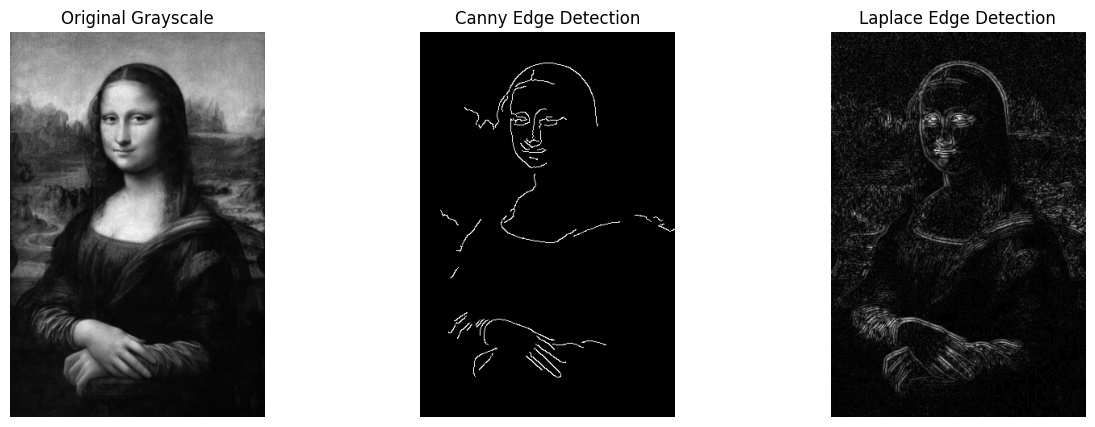

In [6]:
# Task A.3: Implement and apply Canny and Laplace edge detection.
if part_a_grayscale is not None:

    blurred_image = cv2.GaussianBlur(part_a_grayscale, (5, 5), 0)

    # TODO: Apply Canny edge detection
    edges_canny = cv2.Canny(blurred_image, 100, 200)

    # TODO: Apply Laplace edge detection
    lap = cv2.Laplacian(blurred_image, cv2.CV_64F, ksize=3)
    edges_laplace = np.uint8(np.absolute(lap))

    # Display the results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(part_a_grayscale, cmap='gray')
    plt.title('Original Grayscale')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(edges_canny, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(edges_laplace, cmap='gray')
    plt.title('Laplace Edge Detection')
    plt.axis('off')
    plt.show()

#### 4. Region-based Segmentation (GrabCut)
Apply GrabCut, a graph-cut based algorithm, to interactively segment a foreground object from the background. You will use both rectangle-based and mask-based initialization.

![GrabCut](./Grabcut.png)

**Algorithm Steps**:
1. **Initialization**:
   - **Rectangle mode** (`cv2.GC_INIT_WITH_RECT`): User draws a rectangle around the foreground object; everything outside is definite background, inside is probable foreground.
   - **Mask mode** (`cv2.GC_INIT_WITH_MASK`): User provides a mask marking definite/probable foreground/background.
2. **Modeling**: Build GMMs for foreground and background color distributions.
3. **Graph construction**: Pixels are nodes; edges connect neighboring pixels (smoothness) and connect pixels to source/sink nodes (data term).
4. **Graph cut optimization**: Use the min-cut/max-flow algorithm to find the segmentation that minimizes $E(L, \theta)$.
5. **Iterate** steps 2–4 to refine the segmentation.

[Grabcut Tutorial](https://www.youtube.com/watch?v=hEdQAhuYO3A)

**Tasks**:
1. Select a color image with a clear foreground object.
2. Apply GrabCut using a rectangular bounding box to define the foreground region.
3. Apply GrabCut using a mask to define the foreground and background regions.
4. Display the original and the two segmented images for comparison.

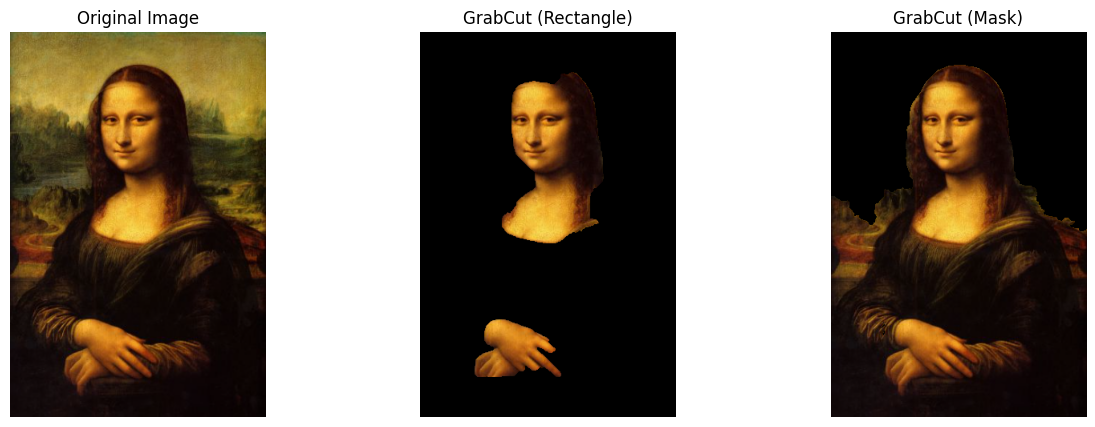

In [11]:
# Task A.4: Implement and apply GrabCut segmentation.
if part_a_color is not None:
    # GrabCut with Rectangle mode
    # TODO: Define a rectangle for the foreground object
    image = part_a_color
    h, w = image.shape[:2]
    rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)
    mask = np.zeros(image.shape[:2], np.uint8)
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # GrabCut with Mask mode
    # TODO: Create an initial mask
    mask2 = np.full((h, w), cv2.GC_PR_BGD, np.uint8)       
    ix, iy, iw, ih = 100, 100, w - 200, h - 200            
    mask2[iy:iy+ih, ix:ix+iw] = cv2.GC_PR_FGD              

    # TODO: Apply GrabCut with cv2.GC_INIT_WITH_MASK
    bgd_model2 = np.zeros((1, 65), np.float64)
    fgd_model2 = np.zeros((1, 65), np.float64)
    cv2.grabCut(image, mask2, None, bgd_model2, fgd_model2, 5, cv2.GC_INIT_WITH_MASK)
    seg2 = np.where((mask2 == cv2.GC_FGD) | (mask2 == cv2.GC_PR_FGD), 255, 0).astype(np.uint8)
    result_mask = cv2.bitwise_and(image, image, mask=seg2)

    # Display the results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(part_a_color, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(result_rect, cv2.COLOR_BGR2RGB))
    plt.title('GrabCut (Rectangle)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(result_mask, cv2.COLOR_BGR2RGB))
    plt.title('GrabCut (Mask)')
    plt.axis('off')
    plt.show()

### B. Applied Segmentation

The goal of this section is to demonstrate that different segmentation techniques are suited for different types of images and tasks. Using the four provided images, you will apply the appropriate segmentation methods to achieve the desired results.

#### 1. Segmenting Road Lines on Image3
The goal is to separate the road lines, curbs, and lane markers from the background.

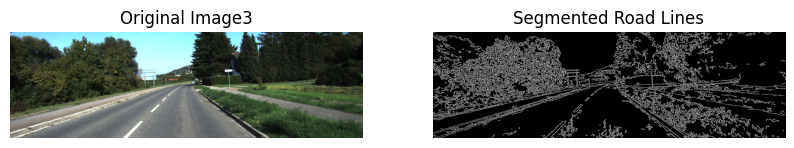

In [ ]:
# Task B.1: Apply detection to seperate road lines to Image3.
image3 = part_b_images.get('Image3.jpg')

if image3 is not None:
    # TODO: Convert to grayscale 
    image3_gray = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

    # TODO: Apply detection to seperate road lines
    roadlines = cv2.Canny(image3_gray, 50, 150)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
    plt.title('Original Image3')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(roadlines, cmap='gray')
    plt.title('Segmented Road Lines')
    plt.axis('off')
    plt.show()

#### 2. Separating Text from Paper on Image1
This task requires segmenting text from a paper background.

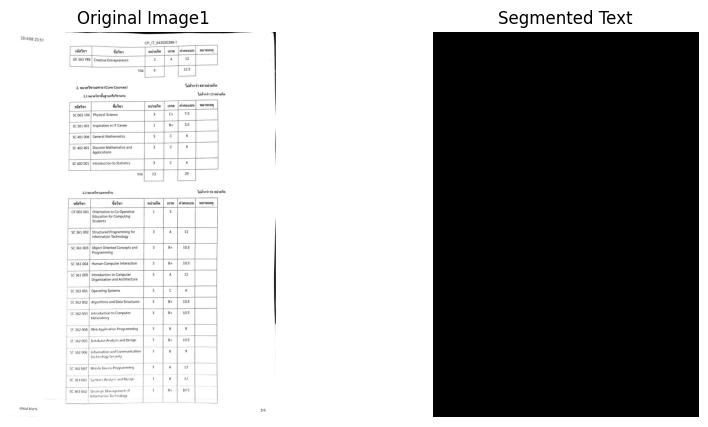

In [ ]:
# Task B.2: Apply detection to seperate text from paper to Image1.
image1 = part_b_images.get('Image1.jpg')

if image1 is not None:
    # TODO: Apply detection
    ret, detected = cv2.threshold(image1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image1, cmap='gray')
    plt.title('Original Image1')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(detected, cmap='gray')
    plt.title('Segmented Text')
    plt.axis('off')
    plt.show()

#### 3. Segmenting Fruits on Image2
This task involves separating different types of fruits from each other and the background. 

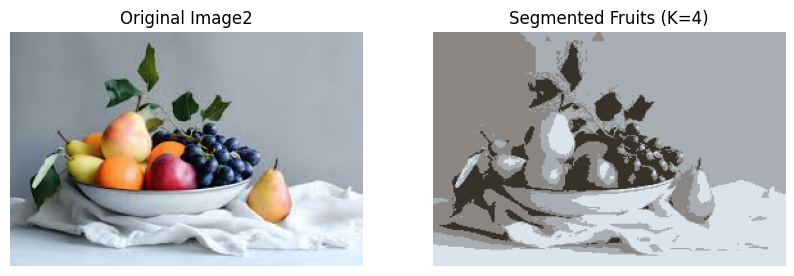

In [ ]:
# Task B.3: Apply segmentation to Image2.
image2 = part_b_images.get('Image2.jpg')

if image2 is not None:
    # Convert to float32 and reshape
    image2_float = image2.astype(np.float32)
    image2_reshaped = image2_float.reshape((-1, 3))

    # TODO: Separate different fruit colors and background
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)

    # Apply K-means clustering with K=4 to separate fruits and background
    k = 4
    compact, labels, centers = cv2.kmeans(
        image2_reshaped, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
    )

    # Convert centers to uint8 and reconstruct the segmented image
    centers = np.uint8(centers)
    segmented_img = centers[labels.flatten()].reshape(image2.shape)


    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title('Original Image2')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Fruits (K=4)')
    plt.axis('off')
    plt.show()

#### 4. Segmenting the Ferret on Image4
This task requires separating a specific foreground object (the ferret) from a complex background. 

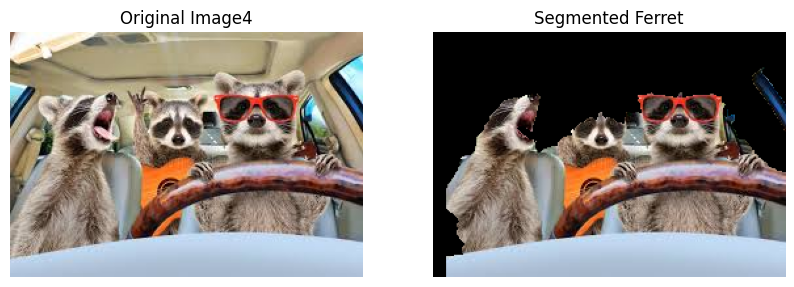

In [8]:
# Task B.4: Apply segmentation to Image4 to get the ferret out of background.
image4 = part_b_images.get('Image4.jpg')

if image4 is not None:
    # TODO: Apply segmentation to get the ferret out of background
    mask = np.zeros(image4.shape[:2], np.uint8)

    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    rect = (10, 10, image4.shape[1] - 10, image4.shape[0] - 10)

    cv2.grabCut(image4, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    mask_final = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    result = image4 * mask_final[:, :, np.newaxis]


    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB))
    plt.title('Original Image4')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Ferret')
    plt.axis('off')
    plt.show()